In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 100)

df = pd.read_csv("Results_2017-18.csv")

# Review Data Accruacy

In [2]:
# Checking the info to see the kind of columns we have and how many non-null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   117 non-null    object 
 1   Entering Grade Level        117 non-null    object 
 2   District                    101 non-null    float64
 3   Birth Month                 117 non-null    object 
 4   OLSAT Verbal Score          117 non-null    object 
 5   OLSAT Verbal Percentile     117 non-null    object 
 6   NNAT Non Verbal Raw Score   117 non-null    object 
 7   NNAT Non Verbal Percentile  117 non-null    int64  
 8   Overall Score               117 non-null    int64  
 9   School Preferences          75 non-null     object 
 10  School Assigned             29 non-null     object 
 11  Will you enroll there?      71 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.1+ KB


We see lots of data type that are objects and those are not going be very fast

In [3]:
df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
112,6/20/2017 16:06:54,1,2.0,August,30,99,44,99,99,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist),Yes
113,6/21/2017 22:52:59,K,20.0,July,97,97,97,99,98,PS229,Ps205,Yes
114,9/14/2017 16:39:55,K,32.0,February,26,99,40,99,99,NaN,NaN,Maybe
115,11/19/2017 17:07:05,K,4.0,April,19,84,33,95,91,Ps 102,Ps102,Yes


#### From a quick glance at the table I can see:

- The timestamp could be switched to the universal date format
- Entering grade level has some 'K's where it could be a 0
- District has some Nan entries
- Will they enroll has entries of both "Yes" and "YES", we could make this a range

In [4]:
# Lets see some of the numbers

df.describe()

,District,NNAT Non Verbal Percentile,Overall Score
count,101.000000,117.000000,117.000000
mean,12.504950,98.632479,97.564103
std,11.406686,1.393323,2.798967
min,1.000000,90.000000,76.000000
25%,2.000000,99.000000,97.000000
50%,3.000000,99.000000,99.000000
75%,25.000000,99.000000,99.000000
max,32.000000,99.000000,99.000000


Very interesting that we are not seeing score values

In [5]:
df.isnull().sum()

Timestamp                      0
Entering Grade Level           0
District                      16
Birth Month                    0
OLSAT Verbal Score             0
OLSAT Verbal Percentile        0
NNAT Non Verbal Raw Score      0
NNAT Non Verbal Percentile     0
Overall Score                  0
School Preferences            42
School Assigned               88
Will you enroll there?        46
dtype: int64

The score columns have no null values so there must be another reason why its not considered a number

In [6]:
# Getting the non numeric values in the OLSAT Verbal Score column
df[df['OLSAT Verbal Score'].str.isnumeric() == False]['OLSAT Verbal Score']

33               24/30
37               23/30
41               17/30
80               24/30
84     Fill out later.
86               19/30
104                 **
108                  -
Name: OLSAT Verbal Score, dtype: object

We'll have to figure out what to do with these

# Converting Data to Numerical Representation & Fixing Null Values

### Switching the "Will you enroll" column to numeric range values

In [7]:
# Data Validation - Making sure all values in 'Will you enroll there?' are lower case
df['Will you enroll there?'] = df['Will you enroll there?'].str.lower()

df['Will you enroll there?'].unique()

array(['yes', 'maybe', nan, 'no'], dtype=object)

In [8]:
# Changing the 'Will you enroll there' column to be numeric
df['Will you enroll there?'] = df['Will you enroll there?'].map({'yes': 1, 'maybe': 0.5, 'no': 0})

print(df['Will you enroll there?'].unique())

[1.  0.5 nan 0. ]


In [9]:
# Replacing any null values in 'Will you enroll there' with a -1
df['Will you enroll there?'] = df['Will you enroll there?'].fillna(-1)

### Setting the birth month to be numeric values

In [10]:
df['Birth Month'] = df['Birth Month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [11]:
print(df['Birth Month'].value_counts())

1     18
3     14
5     13
4     12
2     11
12    11
7     11
10     7
11     7
8      6
9      4
6      3
Name: Birth Month, dtype: int64


### Switching the entering year to be numeric by representing Kindergaten as grade 0

In [12]:
df['Entering Grade Level'] = df['Entering Grade Level'].replace({'K': 0})

In [13]:
# Changing the 'Entering Grade Level' column to be int64
df['Entering Grade Level'] = df['Entering Grade Level'].astype('int64')

In [14]:
df['Entering Grade Level'].value_counts()

0    77
1    28
2    10
3     2
Name: Entering Grade Level, dtype: int64

### Changing the timestamp to be in the universal date format
#### We can remove the time as it's not really needed

In [15]:
# Changing 'Timestamp' column to ISO 8601 format
date = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = date.dt.strftime('%Y%m%d')


In [16]:
# Changing 'Timestamp' column to be numeric
df['Timestamp'] = pd.to_numeric(df['Timestamp'])

In [17]:
df.dtypes

Timestamp                       int64
Entering Grade Level            int64
District                      float64
Birth Month                     int64
OLSAT Verbal Score             object
OLSAT Verbal Percentile        object
NNAT Non Verbal Raw Score      object
NNAT Non Verbal Percentile      int64
Overall Score                   int64
School Preferences             object
School Assigned                object
Will you enroll there?        float64
dtype: object

### Checking if District has to be stored as a float

In [18]:
# Checking if District has to be stored as a float
df['District'].unique()


array([ 6., nan, 22., 11.,  3., 26., 28.,  2.,  1., 15., 25., 14., 20.,
       32., 21., 24., 17., 30., 31.,  4.])

In [19]:
# If district is not specified we'll indicate it as -1
df['District'] = df['District'].fillna(-1)

In [20]:
# Changing the column type to be int64
df['District'] = df['District'].astype('int64')

### Checking table info again

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   117 non-null    int64  
 1   Entering Grade Level        117 non-null    int64  
 2   District                    117 non-null    int64  
 3   Birth Month                 117 non-null    int64  
 4   OLSAT Verbal Score          117 non-null    object 
 5   OLSAT Verbal Percentile     117 non-null    object 
 6   NNAT Non Verbal Raw Score   117 non-null    object 
 7   NNAT Non Verbal Percentile  117 non-null    int64  
 8   Overall Score               117 non-null    int64  
 9   School Preferences          75 non-null     object 
 10  School Assigned             29 non-null     object 
 11  Will you enroll there?      117 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 11.1+ KB


In [22]:
# Looking at the non-numeric values in the dataframe
df[df.select_dtypes(exclude=['int64', 'float64']).columns]

,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,School Preferences,School Assigned
0,28,99,45,"NEST+m, TAG, Anderson, Q300",NEST
1,25,99,39,"Anderson, NEST+m",NaN
2,27,96,42,NaN,NaN
3,23,97,40,NaN,NaN
4,25,98,38,Brooklyn School of Inquiry,Currently - local Brooklyn dual language
...,...,...,...,...,...
112,30,99,44,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist)
113,97,97,97,PS229,Ps205
114,26,99,40,NaN,NaN
115,19,84,33,Ps 102,Ps102


- The school assignment column seems redundant as it is mainly unfilled
- OLSAT Verbal Score seems like its supposed to have a max value of 36 but we see some outliers
- NNAT Nonverbal Score seems like its supposed to have a max value of 48 but we see some outliers

- We can adjust the entries that have score / max score to just be the score

In [23]:
# Fixing the OLSAT Verbal Score column for entries where it is score / max score (e.g. 5/6) to be just the score
df['OLSAT Verbal Score'] = df['OLSAT Verbal Score'].str.split('/').str[0]

In [24]:
# Fixing the NNAT Nonverbal Score column for entries where it is score / max score (e.g. 5/6) to be just the score
df['NNAT Non Verbal Raw Score'] = df['NNAT Non Verbal Raw Score'].str.split('/').str[0]

In [25]:
# Checking the values again
df[df.select_dtypes(exclude=['int64', 'float64']).columns]

,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,School Preferences,School Assigned
0,28,99,45,"NEST+m, TAG, Anderson, Q300",NEST
1,25,99,39,"Anderson, NEST+m",NaN
2,27,96,42,NaN,NaN
3,23,97,40,NaN,NaN
4,25,98,38,Brooklyn School of Inquiry,Currently - local Brooklyn dual language
...,...,...,...,...,...
112,30,99,44,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist)
113,97,97,97,PS229,Ps205
114,26,99,40,NaN,NaN
115,19,84,33,Ps 102,Ps102


- Some rows have such little or insufficient data that we can just remove them

In [26]:
# Removing the rows that have little or insufficient information
# This includes row 84, 104, 108
# While deleting rows is not the best practice, these entries simply do not have enough information to be useful
df = df.drop([84, 104, 108])

In [27]:
# Now we should be able to make the columns numeric
df['OLSAT Verbal Score'] = pd.to_numeric(df['OLSAT Verbal Score'])
df['NNAT Non Verbal Raw Score'] = pd.to_numeric(df['NNAT Non Verbal Raw Score'])
df['OLSAT Verbal Percentile'] = pd.to_numeric(df['OLSAT Verbal Percentile'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   114 non-null    int64  
 1   Entering Grade Level        114 non-null    int64  
 2   District                    114 non-null    int64  
 3   Birth Month                 114 non-null    int64  
 4   OLSAT Verbal Score          114 non-null    int64  
 5   OLSAT Verbal Percentile     114 non-null    int64  
 6   NNAT Non Verbal Raw Score   114 non-null    int64  
 7   NNAT Non Verbal Percentile  114 non-null    int64  
 8   Overall Score               114 non-null    int64  
 9   School Preferences          74 non-null     object 
 10  School Assigned             28 non-null     object 
 11  Will you enroll there?      114 non-null    float64
dtypes: float64(1), int64(9), object(2)
memory usage: 11.6+ KB


In [29]:
df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,20170408,1,6,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,1.0
1,20170407,0,-1,8,25,99,39,99,99,"Anderson, NEST+m",NaN,0.5
2,20170407,1,-1,3,27,96,42,99,98,NaN,NaN,0.5
3,20170407,0,-1,9,23,97,40,99,98,NaN,NaN,-1.0
4,20170410,0,22,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
112,20170620,1,2,8,30,99,44,99,99,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist),1.0
113,20170621,0,20,7,97,97,97,99,98,PS229,Ps205,1.0
114,20170914,0,32,2,26,99,40,99,99,NaN,NaN,0.5
115,20171119,0,4,4,19,84,33,95,91,Ps 102,Ps102,1.0


## The problem with the school columns
#### Not Really sure what to do with the school assignment column or the school preferences column

The school assignment column only has 28 non null values which isn't a lot of data
Also the school preference column is done in so many different formats that it would be hard to convert to a numerical value

Personally, I think that the school assignment column could be dropped as it is not very useful but I don't know
if it is crucial to the dataset and the collectors. This could impose a risk

We could maybe convert the school preference column to a numerical value by assigning a number to each unqiue school entry
and then assigning the unique number to the school preference column.

In [30]:
df['School Preferences'].unique()

# If School Preferences is not specified we'll indicate it as "No Preference" for now
df['School Preferences'] = df['School Preferences'].fillna("No Preference")

# Extracting all the unique schools in School Preferences
schools = []
for i in df['School Preferences']:
    for j in i.split(','):
        schools.append(j.strip())
        
# Making every item in the list lower case for data consistency
schools = [x.lower() for x in schools]

# Removing the duplicates
schools = list(set(schools))

print(schools)

['no preference', '', 'ps 11', 'tag', 'ps11', '77', 'likely staying in zoned schools; d15 g&t options are limited.', 'ps166', 'ps 33', 'ps144', 'ps205', 'ps33', '30th av', '33', 'ps50', 'ps53', 'ps203', 'anderson', 'tag young', 'ps 102', '124', 'p.s.203q', 'q300', '130', 'brooklyn school of inquiry', 'nest/anderson/q300', 'anderson nest tag q300', 'tbd', 'any city-wide', 'ps130', 'all cw', 'nest + m', '334', '11', '316', 'ps 77', 'ps121', '166', 'na', 'll', 'nest', '38', '174', 'ps124', '539', 'lower lab', '144', 'ps163', '12', 'nest/ps33', '122', 'ps188', 'bsi', 'any citywide or district 3 school', 'ps77', '111', 'anderson (sibling)', 'nest+t', 'ps q203', 'ps174', 'nest+m', '217', 'nestm', '163', 'ps229', '300', '198']


### Now the school preferences value correspond to the number in the dictionary

In [31]:
# Giving each of the school preferences a unique value and mapping it
# to the School Assigned column

schools_dict = {}
for i in range(len(schools)):
    schools_dict[schools[i]] = i

df['School Preferences'] = df['School Preferences'].str.lower().map(schools_dict)

### Lets do the same for the school assignment column

In [32]:
# Getting the unique values in the 'School Assignment' column
df['School Assigned'].unique()

# If School Assigned is not specified we'll indicate it as "No Preference" for now
df['School Assigned'] = df['School Assigned'].fillna("No Preference")

# Extracting all the unique schools in School Assigned
schools_assigned = []
for i in df['School Assigned']:
    for j in i.split(','):
        schools_assigned.append(j.strip())

# Making every item in the list lower case for data consistency
schools_assigned = [x.lower() for x in schools_assigned]

# Removing the duplicates
schools_assigned = list(set(schools_assigned))

print(schools_assigned)

['no preference', 'ps 163', 'tag', 'ps166', 'ps205', 'ps33', 'ps 158', 'lower lab (off waitlist)', 'anderson', 'q300', 'ps102', 'brooklyn school of inquiry', 'ps130', 'ps 32 q', 'nest', 'lower lab', 'ps q203', '175', 'none', '163', 'ps 203', 'currently - local brooklyn dual language']


In [33]:
# Giving each of the school preferences a unique value and mapping it
# to the School Assigned column

school_assigned_dict = {}
for i in range(len(schools_assigned)):
    school_assigned_dict[schools_assigned[i]] = i

df['School Assigned'] = df['School Assigned'].str.lower().map(school_assigned_dict)

In [34]:
df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,20170408,1,6,9,28,99,45,99,99,NaN,14,1.0
1,20170407,0,-1,8,25,99,39,99,99,NaN,0,0.5
2,20170407,1,-1,3,27,96,42,99,98,0.0,0,0.5
3,20170407,0,-1,9,23,97,40,99,98,0.0,0,-1.0
4,20170410,0,22,4,25,98,38,99,99,24.0,21,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
112,20170620,1,2,8,30,99,44,99,99,NaN,7,1.0
113,20170621,0,20,7,97,97,97,99,98,64.0,4,1.0
114,20170914,0,32,2,26,99,40,99,99,0.0,0,0.5
115,20171119,0,4,4,19,84,33,95,91,19.0,10,1.0


### Now the School Assigned Column should correspond to the number in the dictionary

In [35]:
print(school_assigned_dict)

{'no preference': 0, 'ps 163': 1, 'tag': 2, 'ps166': 3, 'ps205': 4, 'ps33': 5, 'ps 158': 6, 'lower lab (off waitlist)': 7, 'anderson': 8, 'q300': 9, 'ps102': 10, 'brooklyn school of inquiry': 11, 'ps130': 12, 'ps 32 q': 13, 'nest': 14, 'lower lab': 15, 'ps q203': 16, '175': 17, 'none': 18, '163': 19, 'ps 203': 20, 'currently - local brooklyn dual language': 21}


### To Handle the null values we'll just replace them with the mode

In [36]:
# Replace null values in School Preferences column with the mean value
df['School Preferences'] = df['School Preferences'].fillna(df['School Preferences'].mode())

In [37]:
# Replace null values in School Assgined column with the mean value
df['School Assigned'] = df['School Assigned'].fillna(df['School Assigned'].mode())

In [38]:
# Fill in the null values in the School Assigned column with a -1
df['School Preferences'] = df['School Preferences'].fillna(-1)

# Examine Linearity and Normality

### Showing Histograms of the data

array([[<AxesSubplot:title={'center':'Timestamp'}>,
        <AxesSubplot:title={'center':'Entering Grade Level'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Birth Month'}>,
        <AxesSubplot:title={'center':'OLSAT Verbal Score'}>,
        <AxesSubplot:title={'center':'OLSAT Verbal Percentile'}>],
       [<AxesSubplot:title={'center':'NNAT Non Verbal Raw Score'}>,
        <AxesSubplot:title={'center':'NNAT Non Verbal Percentile'}>,
        <AxesSubplot:title={'center':'Overall Score'}>],
       [<AxesSubplot:title={'center':'School Preferences'}>,
        <AxesSubplot:title={'center':'School Assigned'}>,
        <AxesSubplot:title={'center':'Will you enroll there?'}>]],
      dtype=object)

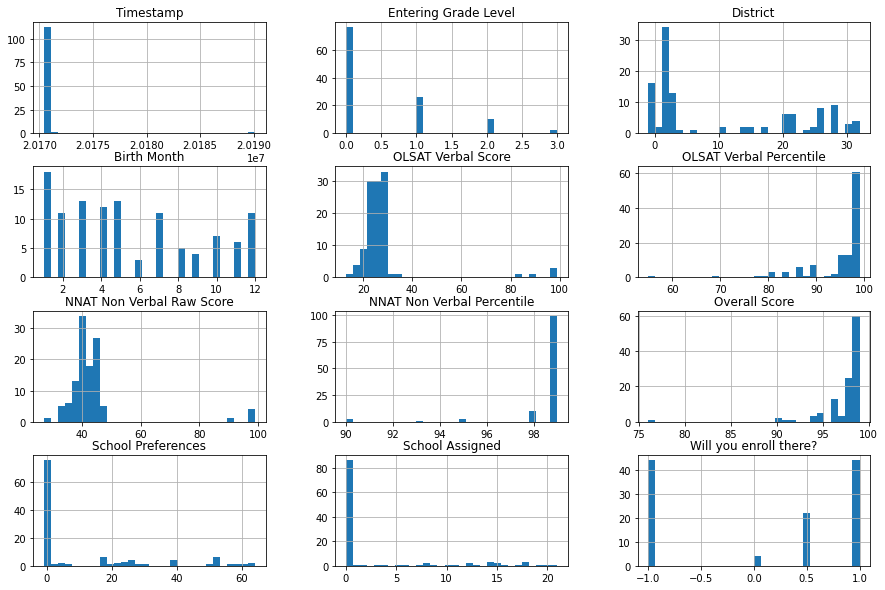

In [39]:
# you can also get a histogram of all columns
df.hist(bins=30, figsize=(15, 10))

We can see that a couple of the columns contain some outliers

In [40]:
df.describe()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
count,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2.017064e+07,0.456140,10.675439,5.535088,28.228070,94.929825,43.412281,98.631579,97.587719,10.543860,2.894737,0.096491
std,1.842480e+03,0.730382,11.594548,3.648687,14.532865,6.991422,12.074849,1.409595,2.799530,18.765502,5.820879,0.904456
min,2.017041e+07,0.000000,-1.000000,1.000000,13.000000,55.000000,27.000000,90.000000,76.000000,-1.000000,0.000000,-1.000000
25%,2.017041e+07,0.000000,2.000000,2.250000,23.250000,95.250000,39.000000,99.000000,97.250000,-1.000000,0.000000,-1.000000
50%,2.017042e+07,0.000000,3.000000,5.000000,26.000000,98.000000,41.000000,99.000000,99.000000,0.000000,0.000000,0.500000
75%,2.017051e+07,1.000000,22.000000,8.000000,28.000000,99.000000,44.000000,99.000000,99.000000,17.000000,0.000000,1.000000
max,2.019011e+07,3.000000,32.000000,12.000000,99.000000,99.000000,99.000000,99.000000,99.000000,64.000000,21.000000,1.000000


We're seeing a lot more now than from the first time we called this method

We also see that the max for the verbal and non verbal scores are 99 when their means are much lower

<AxesSubplot:>

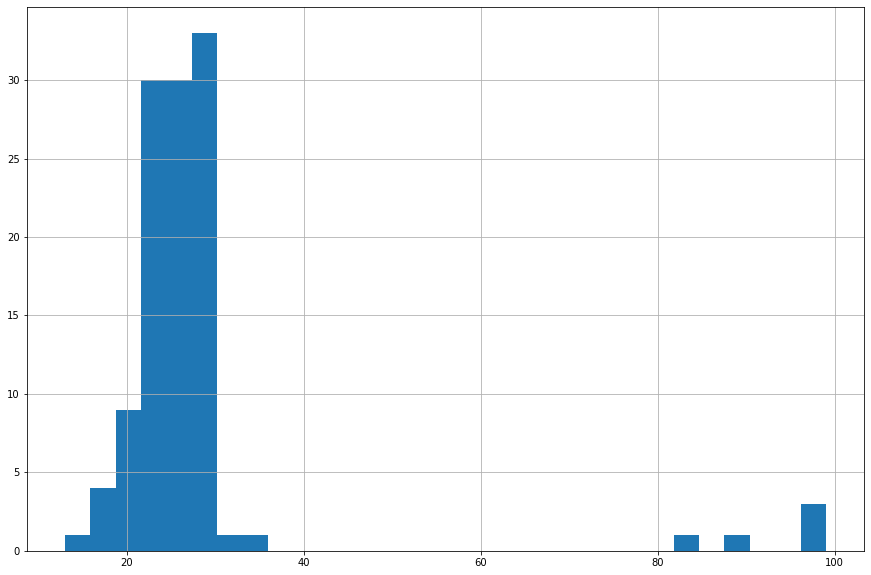

In [41]:
# Showing the distribution of the OLSAT Verbal Score
df['OLSAT Verbal Score'].hist(bins=30, figsize=(15, 10))

<AxesSubplot:>

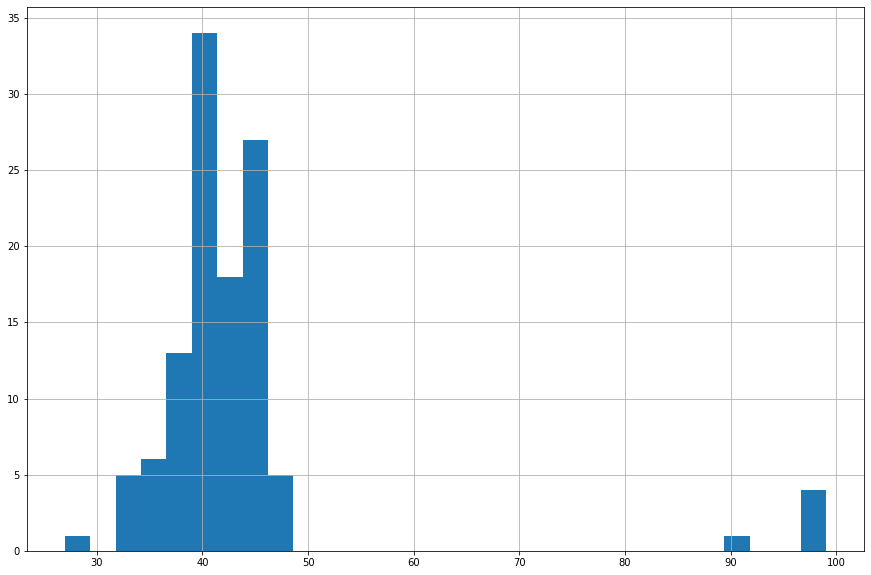

In [42]:
# Showing the distribution of the NNAT Non Verbal Raw Score
df['NNAT Non Verbal Raw Score'].hist(bins=30, figsize=(15, 10))

# Outlier Handling

In [43]:
# Printing the OLSAT Verbal Score values that are greater than 75
df[df['OLSAT Verbal Score'] > 75]

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
68,20170426,0,2,9,99,99,99,99,99,0.0,0,-1.0
72,20170426,3,30,10,90,90,90,90,90,0.0,0,-1.0
98,20170601,0,2,7,83,83,99,99,95,-1.0,18,-1.0
111,20170607,0,2,12,99,99,99,99,99,0.0,0,1.0
113,20170621,0,20,7,97,97,97,99,98,64.0,4,1.0


We could assume that the values are this high because they used their score percent rather than the score itself

In [44]:
# Converting the OLSAT Verbal Score values that are greater than 75 from a percentage to a raw score out of 30, the presumed max score
df.loc[df['OLSAT Verbal Score'] > 75, 'OLSAT Verbal Score'] = df['OLSAT Verbal Score'] * 30 / 100

In [45]:
# Converting the Non-Verbal NNAT Score values that are greater than 75 from a percentage to a raw score out of 48, the presumed max score
df.loc[df['NNAT Non Verbal Raw Score'] > 75, 'NNAT Non Verbal Raw Score'] = df['NNAT Non Verbal Raw Score'] * 48 / 100

array([[<AxesSubplot:title={'center':'Timestamp'}>,
        <AxesSubplot:title={'center':'Entering Grade Level'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Birth Month'}>,
        <AxesSubplot:title={'center':'OLSAT Verbal Score'}>,
        <AxesSubplot:title={'center':'OLSAT Verbal Percentile'}>],
       [<AxesSubplot:title={'center':'NNAT Non Verbal Raw Score'}>,
        <AxesSubplot:title={'center':'NNAT Non Verbal Percentile'}>,
        <AxesSubplot:title={'center':'Overall Score'}>],
       [<AxesSubplot:title={'center':'School Preferences'}>,
        <AxesSubplot:title={'center':'School Assigned'}>,
        <AxesSubplot:title={'center':'Will you enroll there?'}>]],
      dtype=object)

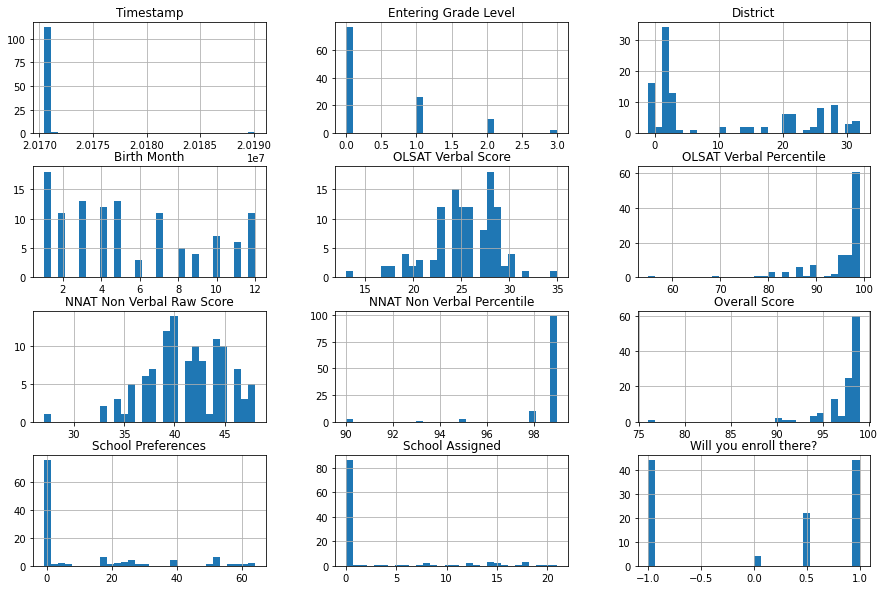

In [46]:
# Plotting the columns again
df.hist(bins=30, figsize=(15, 10))

### Now the graphs of the scores are looking much more normal!

However, we still see some outliers in the score percentile columns and in the overall score column

In [47]:
# Printing the OLSAT Verbal Percentile outliers below 75
df[df['OLSAT Verbal Percentile'] < 75]

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
34,20170410,0,28,8,13.0,55,27.0,90,76,0.0,0,-1.0
79,20170503,1,17,2,21.0,69,42.0,99,92,-1.0,0,0.5


In [48]:
df.describe()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
count,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2.017064e+07,0.456140,10.675439,5.535088,25.354386,94.929825,41.204561,98.631579,97.587719,10.543860,2.894737,0.096491
std,1.842480e+03,0.730382,11.594548,3.648687,3.494221,6.991422,3.842605,1.409595,2.799530,18.765502,5.820879,0.904456
min,2.017041e+07,0.000000,-1.000000,1.000000,13.000000,55.000000,27.000000,90.000000,76.000000,-1.000000,0.000000,-1.000000
25%,2.017041e+07,0.000000,2.000000,2.250000,23.250000,95.250000,39.000000,99.000000,97.250000,-1.000000,0.000000,-1.000000
50%,2.017042e+07,0.000000,3.000000,5.000000,26.000000,98.000000,41.000000,99.000000,99.000000,0.000000,0.000000,0.500000
75%,2.017051e+07,1.000000,22.000000,8.000000,28.000000,99.000000,44.000000,99.000000,99.000000,17.000000,0.000000,1.000000
max,2.019011e+07,3.000000,32.000000,12.000000,35.000000,99.000000,48.000000,99.000000,99.000000,64.000000,21.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   114 non-null    int64  
 1   Entering Grade Level        114 non-null    int64  
 2   District                    114 non-null    int64  
 3   Birth Month                 114 non-null    int64  
 4   OLSAT Verbal Score          114 non-null    float64
 5   OLSAT Verbal Percentile     114 non-null    int64  
 6   NNAT Non Verbal Raw Score   114 non-null    float64
 7   NNAT Non Verbal Percentile  114 non-null    int64  
 8   Overall Score               114 non-null    int64  
 9   School Preferences          114 non-null    float64
 10  School Assigned             114 non-null    int64  
 11  Will you enroll there?      114 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 15.6 KB


# Final Copy of the Data Frame

In [50]:
pd.set_option('display.max_rows', 200)

df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,20170408,1,6,9,28.0,99,45.00,99,99,0.0,14,1.0
1,20170407,0,-1,8,25.0,99,39.00,99,99,-1.0,0,0.5
2,20170407,1,-1,3,27.0,96,42.00,99,98,0.0,0,0.5
3,20170407,0,-1,9,23.0,97,40.00,99,98,0.0,0,-1.0
4,20170410,0,22,4,25.0,98,38.00,99,99,24.0,21,0.5
5,20170407,0,-1,5,24.0,97,36.00,98,98,0.0,0,-1.0
6,20170407,0,-1,2,26.0,99,42.00,99,99,26.0,0,-1.0
7,20170407,0,-1,10,24.0,99,42.00,99,99,-1.0,0,1.0
8,20170407,1,-1,3,23.0,81,42.00,99,95,0.0,0,-1.0
9,20170407,2,-1,4,29.0,99,44.00,99,99,53.0,0,1.0


## The entire data frame is now represented numerically and has no null values

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   114 non-null    int64  
 1   Entering Grade Level        114 non-null    int64  
 2   District                    114 non-null    int64  
 3   Birth Month                 114 non-null    int64  
 4   OLSAT Verbal Score          114 non-null    float64
 5   OLSAT Verbal Percentile     114 non-null    int64  
 6   NNAT Non Verbal Raw Score   114 non-null    float64
 7   NNAT Non Verbal Percentile  114 non-null    int64  
 8   Overall Score               114 non-null    int64  
 9   School Preferences          114 non-null    float64
 10  School Assigned             114 non-null    int64  
 11  Will you enroll there?      114 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 15.6 KB
